
# Project: Investigating Appointments With No-Show Patients

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

this data contains of 100k medical appoinments that determine wheather the paitent showed up or not.this data include extra inforamtion such as gender,age,ScheduledDay.and information about some diseases such as hypertension, diabetes, alcoholism, handicap.

I will be exploring the No Show Patient Appointments dataset. I downloaded the No Show Appointments dataset and saved it as 'noshow.csv'. Using the Udacity provided Jupyter Notebook template I imported all the packages that might be needed. Some questions I look to answer through analyzing this dataset include:

1) What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
what about the  
2) Does the neighborhood have some kind of impact or relationship in terms of people showing up for appointments or not?

In [32]:
#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

# <a id='wrangling'></a>
## Data Wrangling

### General Properties
> Load your data and save it to 'df'. The df dataframe is all the appointments, regardless of whether or not the person showed up or not.

In [70]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv', encoding='latin-1')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Summary for the data¶

> Perform operations to inspect data types and look for instances of missing or possibly errant data. The describe function helps to get an overview of the data from a statistical summary viewpoint. This is also useful for spotting any potential errors that might need a closer look.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


## There is no missing data, all columns is not null

In [6]:
df.shape

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
min in age is -1 
max in age is 115 
the min is mistak 

columne age need scaler

In [8]:
max_age = df[df['Age'] == 115]
max_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [10]:
# Replace the Age value of -1 with min_age
min_age = df[df['Age'] == -1]
df.Age.replace([-1],[0], inplace = True)

Looking for Data that need to be cleaned

# Data Cleaning!

In [11]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [12]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


['ScheduledDay']['AppointmentDay'] is object but thit must be convert to datatime

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 8.9+ MB


In [15]:
# Rename some of column's names
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Get the Timespan is the deffirence between ScheduledDay and AppointmentDay t

In [16]:
df['Timespan']=df['ScheduledDay']-df['AppointmentDay']
df['Timespan'].describe()

count                       110527
mean     -11 days +19:35:28.171397
std        15 days 06:07:11.673762
min            -179 days +00:00:00
25%             -15 days +00:00:00
50%              -4 days +00:00:00
75%                0 days 00:00:00
max                6 days 00:00:00
Name: Timespan, dtype: object

here is negtive in timespan is differance between (ScheduledDay-AppointmentDay)

In [17]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Timespan
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,-2 days
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,-2 days
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,-2 days
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0 days
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,-2 days


In [19]:
df['Timespan'] = pd.to_numeric(df['Timespan'])

In [20]:
df = df[df['Timespan'] >= 0 ]

In [21]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Timespan
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0
19,F,2016-04-29,2016-04-29,46,DA PENHA,0,0,0,0,0,0,No,0
24,F,2016-04-29,2016-04-29,65,TABUAZEIRO,0,0,0,0,0,0,No,0
26,F,2016-04-29,2016-04-29,45,BENTO FERREIRA,0,1,0,0,0,0,No,0
28,M,2016-04-29,2016-04-29,51,SÃO PEDRO,0,0,0,0,0,0,No,0


## <a id='eda'></a>
## Exploratory Data Analysis

# Research Question 1 (multi-variable exploration):

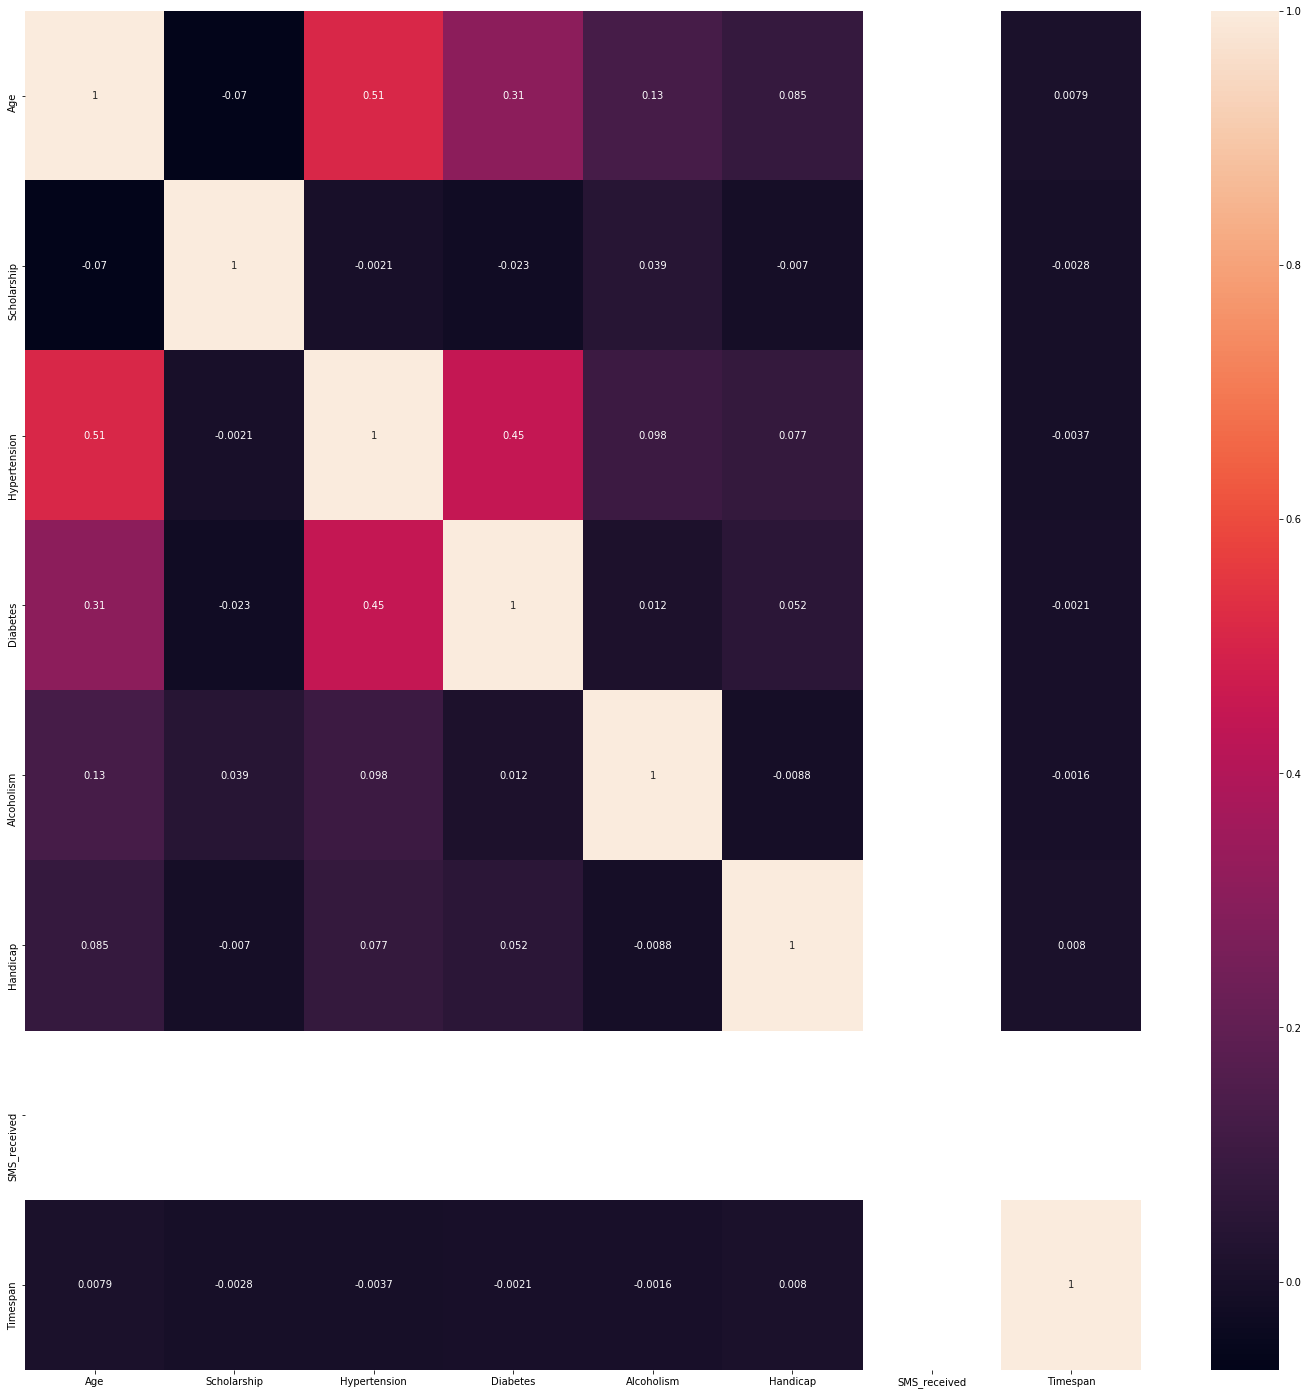

In [34]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True);

relationship between this columns weak

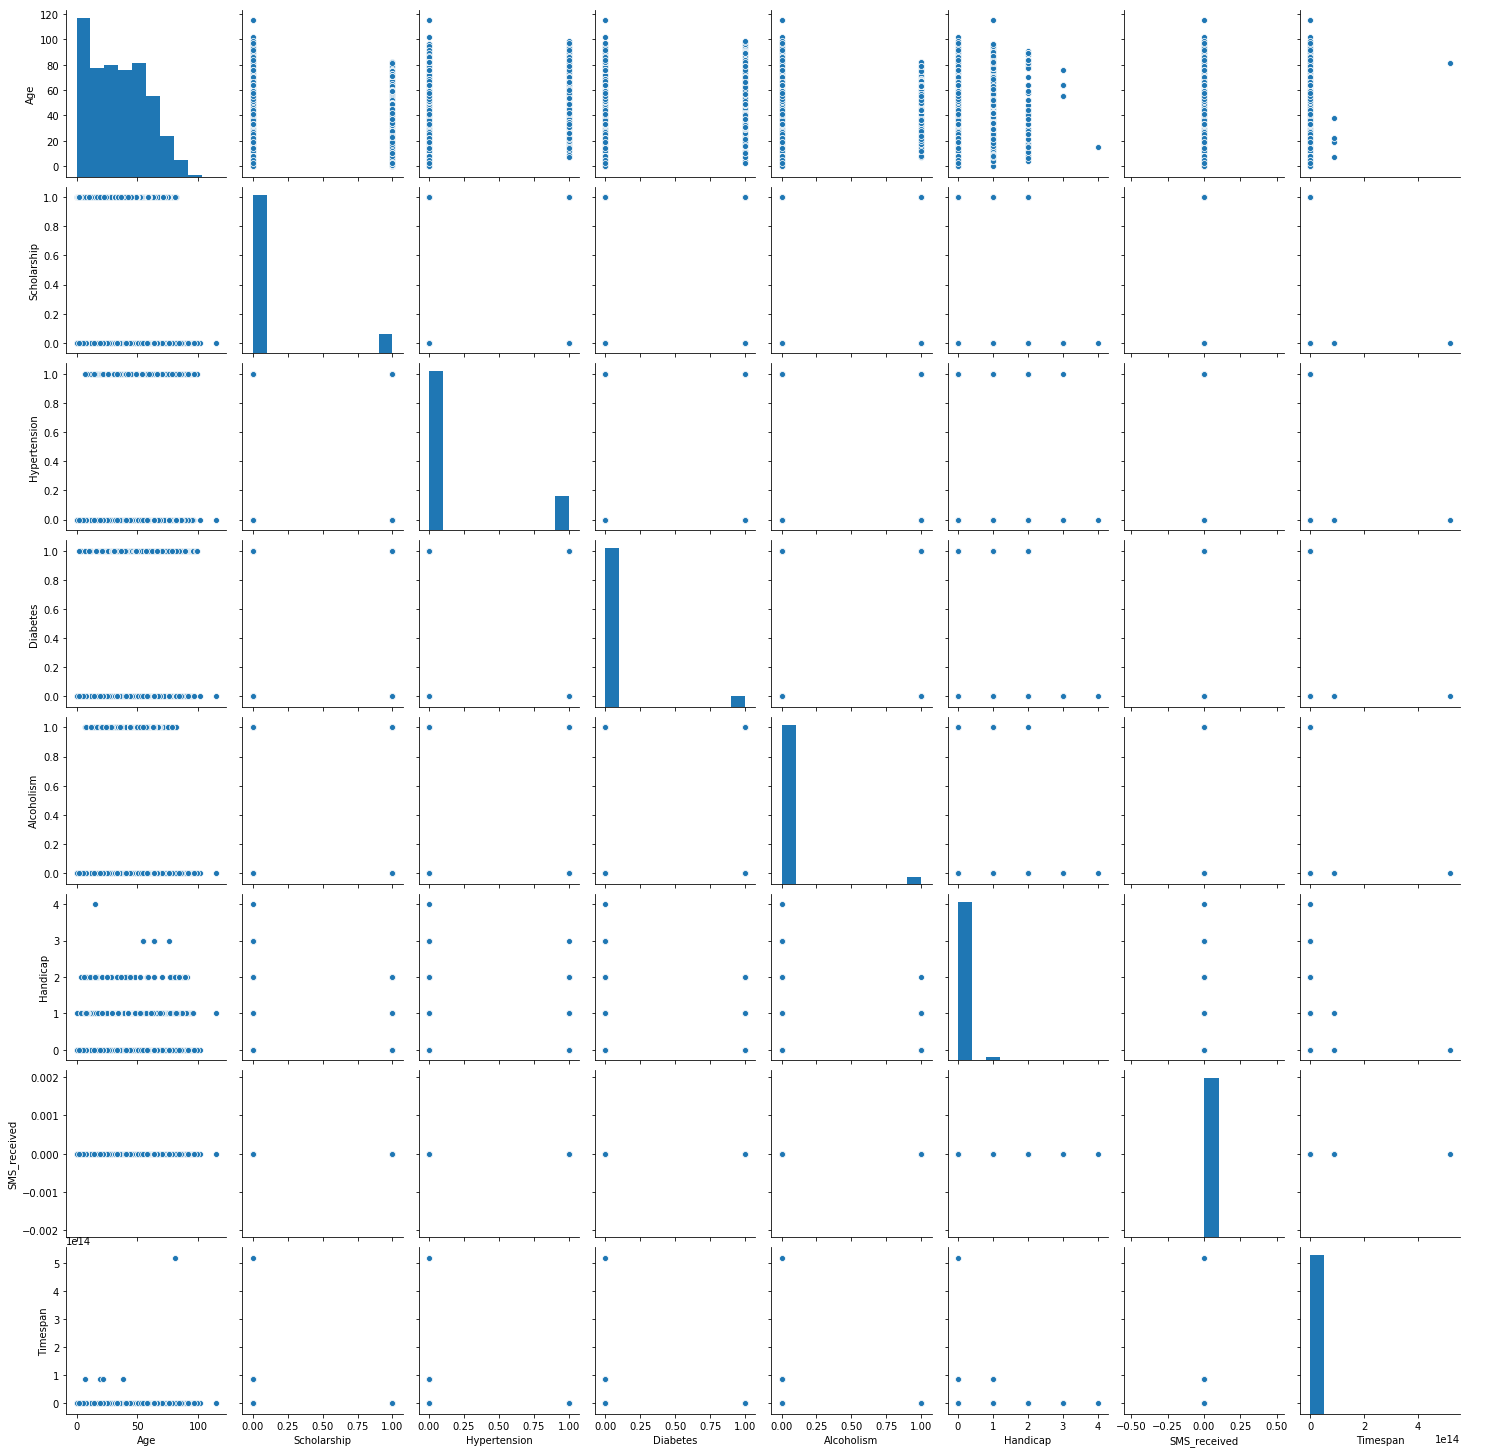

In [35]:
sns.pairplot(df)

# how many no and yes in df["No-show"] ?

In [53]:
#value counts for NO-SHOW 
df['No-show'].value_counts()

No     36771
Yes     1797
Name: No-show, dtype: int64

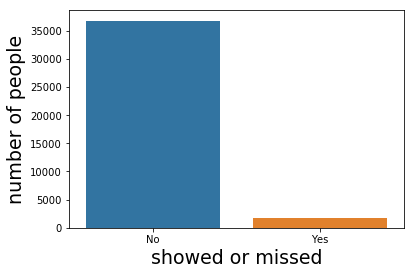

In [54]:
sns.countplot(df["No-show"])
plt.xlabel("showed or missed",fontsize=19);

plt.ylabel("number of people",fontsize=19);

In [ ]:
Get the relation between Gender and patients who showed

In [55]:
df['Gender'].value_counts()

F    23770
M    14798
Name: Gender, dtype: int64

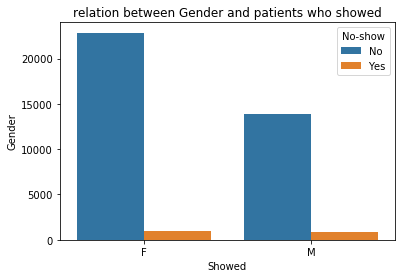

In [56]:
sns.countplot(df['Gender'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Gender")
plt.title("relation between Gender and patients who showed");

In [ ]:
We can see that of the 38,568 patients that appeared, about 23770 were female and 14798 were male. Of the 22,500 patients who did not come for a visit, about 15,000 were females and 7,500 were males The ratio of females to males who attended appears to be the same as that which did not come to visit, and therefore gender does not affect

26% for femal

24% for male

# what about the Scholarship?

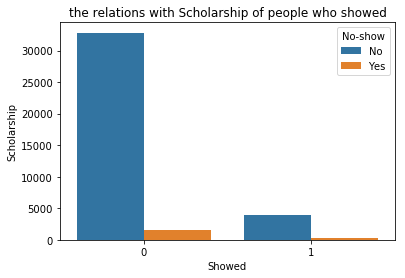

In [57]:
sns.countplot(df['Scholarship'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Scholarship")
plt.title("the relations with Scholarship of people who showed");

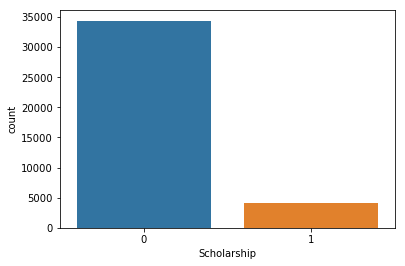

In [58]:
sns.countplot(df['Scholarship'])

people not have Scholarship more than people have Scholarship in show

# what about the Hypertension?

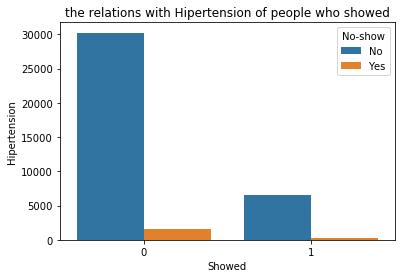

In [59]:
sns.countplot(df['Hypertension'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Hipertension")
plt.title("the relations with Hipertension of people who showed");

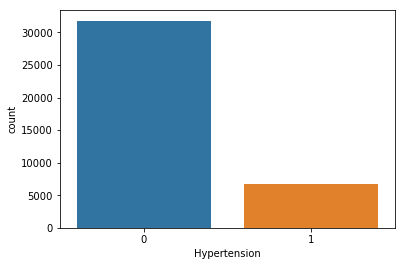

In [60]:
sns.countplot(df['Hypertension'])

In [ ]:
people not have Hypertension more than people have Hypertension in show

# what about the Diabetes?

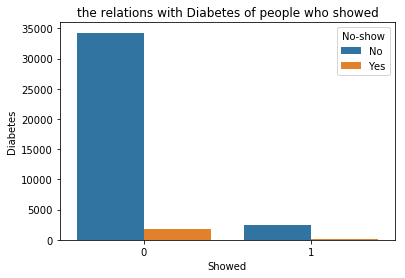

In [61]:
sns.countplot(df['Diabetes'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Diabetes")
plt.title("the relations with Diabetes of people who showed");

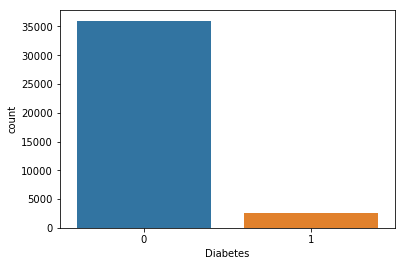

In [62]:
sns.countplot(df['Diabetes'])

# what about the Alcoholism?

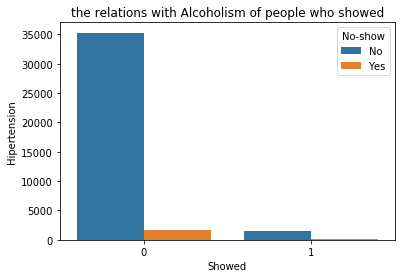

In [63]:
sns.countplot(df['Alcoholism'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Hipertension")
plt.title("the relations with Alcoholism of people who showed");

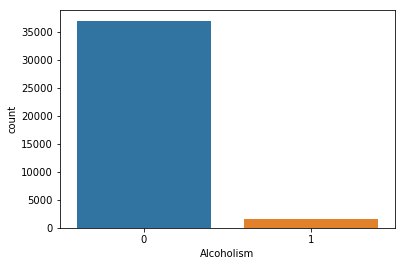

In [64]:
sns.countplot(df['Alcoholism'])

# what about the Handicap?

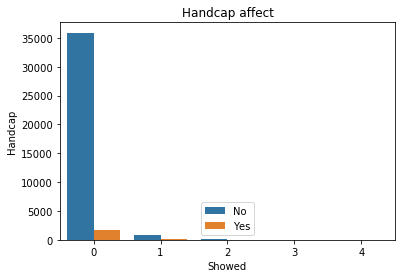

In [65]:
sns.countplot(df['Handicap'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Handcap")
plt.title("Handcap affect")
plt.legend();

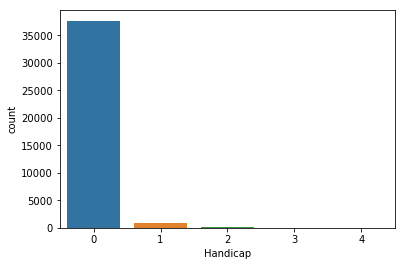

In [66]:
sns.countplot(df['Handicap'])

# what about the SMS_received?

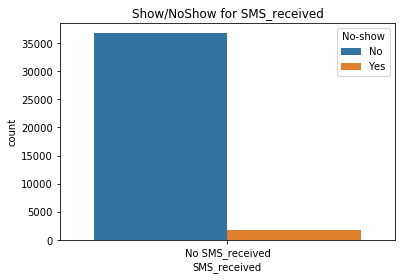

In [67]:
ax = sns.countplot(x=df.SMS_received, hue=df["No-show"], data=df)
ax.set_title("Show/NoShow for SMS_received")
x_ticks_labels=['No SMS_received', 'SMS_received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

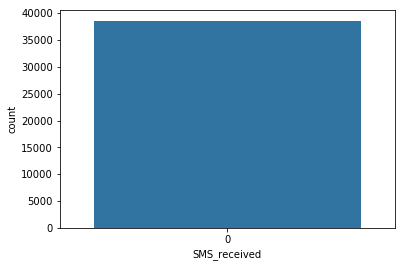

In [68]:
sns.countplot(df['SMS_received'])

# Research Question 2 (multi-variable exploration):
# what about the neighborhood ?

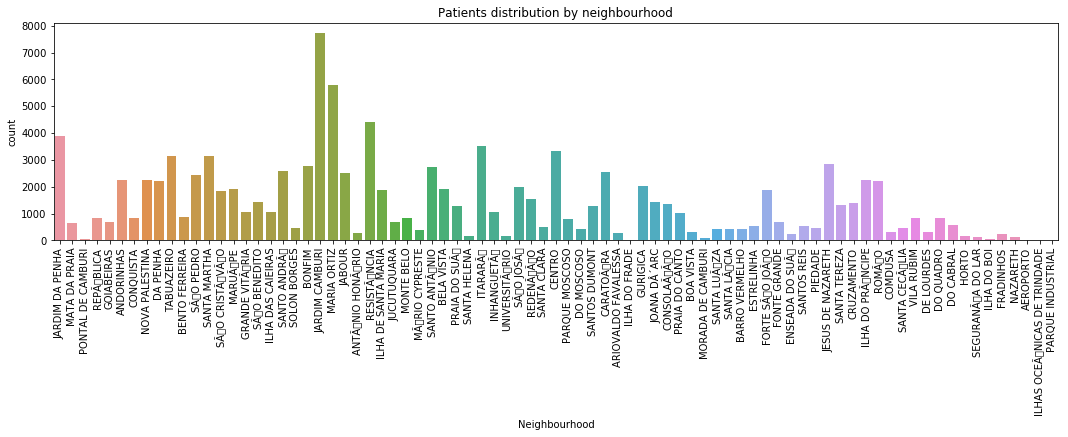

In [71]:
plt.figure(figsize=(18,4))
plt.title('Patients distribution by neighbourhood')
sns.countplot(x=df.Neighbourhood, data=df, hue_order=df["No-show"]);
plt.xticks(rotation='90')
plt.show()

In [72]:
df.Age.mean()

37.08887421173107

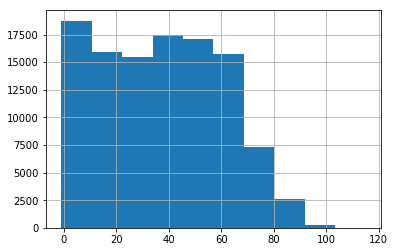

In [73]:
df.Age.hist()

# Limitations
there are some missing values such as the price,the appoinments is affordable or not..

<a id='conclusions'></a>
## Conclusions

there are avery strong relation between sms_reminder and people that showed_up so it suppose to send sms-message regulary the number of people that showed up is 88208 or 77.2% and not showen_up is 22319 or 22.8%men are more persistent to go to the appoinments *age is the most important factor.

age on 0 to 10 show more than any groub ,,,, people have [Scholarship Hypertension Diabetes Alcoholism Handicap] not show more than have not ,,,,,
people not received him sms show more than received him ,,,,